In [ ]:
# Importing required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importing Data from GDrive

from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
# Head() - It is used to read first five rows from the table.

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/aadhar_dataset.csv', low_memory=False)
df.head()

In [ ]:
df.shape           # To know the total number of Rows and Columns (rows, columns)

In [ ]:
# To know the unique values of that given variable/feature.

print(df['State'].unique())

In [ ]:
# To check missing or null values in the table.

df.isnull().sum()

In [ ]:
df.columns     # To know the column names present in Dataset.

In [ ]:
# To rename the column names of Dataset.

df = df.rename(columns={'Enrolment Agency':'Agency',\
                        'Sub District':'S_District',\
                       'Aadhaar generated':'Generated',\
                       'Enrolment Rejected':'Rejected',\
                       'Residents providing email':'Email',\
                       'Residents providing mobile number':'Mobile_num'})

In [ ]:
df.columns     # To print renamed columns

In [ ]:
df.loc[df['Generated']>0,'Generated'] = 1
df.loc[df['Rejected']>0,'Rejected'] = 1
df.loc[df['Mobile_num']>0,'Mobile_num'] = 1
df['Gender'] = df['Gender'].map( {'F': 0, 'M': 1,'T': 2} ).astype(int)
df.loc[df['Age']==0 ,'Age'] = np.NAN
print('Number of states for which data exists: ',len(df['State'].unique()))

In [ ]:
df.head()       # Records of First Five rows of Dataset.

In [ ]:
# To chech the unique values of given column that exist in Dataset. 

print('Number of states for which data exists: ',len(df['State'].unique()))
print('Number of District for which data exists: ',len(df['District'].unique()))
print('Number of S_District for which data exists: ',len(df['S_District'].unique()))
print(df['Gender'].unique())

Number of states for which data exists:  37
Number of District for which data exists:  664
Number of S_District for which data exists:  5340
[0 1 2]


In [ ]:
# VISUALIZATION

def prepare_plot_area(ax):
    # Remove plot frame lines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False) 
    
    # X and y ticks on bottom and left
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()

# Defining a color pattern based.

colrcode = [(31, 119, 180), (255, 127, 14),\
             (44, 160, 44), (214, 39, 40),\
             (148, 103, 189),  (140, 86, 75),\
             (227, 119, 194), (127, 127, 127),\
             (188, 189, 34), (23, 190, 207)]

for i in range(len(colrcode)):  
    r, g, b = colrcode[i]  
    colrcode[i] = (r / 255., g / 255., b / 255.)

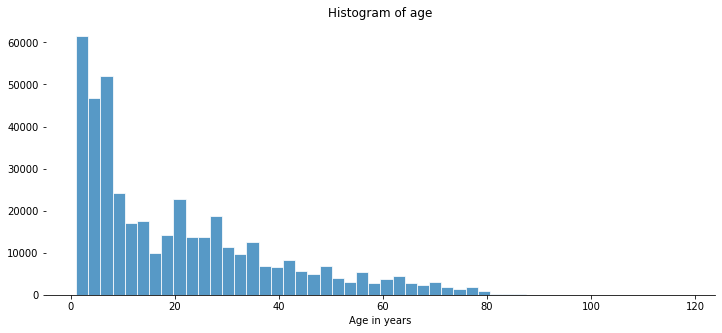

In [ ]:
## Histogram of age of Aadhar applicants.

fix = plt.subplots(figsize=(12,5))
p = plt.hist(df[df['Age'].notnull()]['Age'], 50, edgecolor = [1,1,1], alpha=0.75)
plt.title('Histogram of age')
plt.xlabel('Age in years')
prepare_plot_area(plt.gca())


In [ ]:
# Records showing the percentage of Man, Woman, trans.

perM = np.around(df[df['Gender']==1]['Gender'].count()/df['Gender'].count()*100,2)
perF = np.around(df[df['Gender']==0]['Gender'].count()/df['Gender'].count()*100,2)
perT = np.around(df[df['Gender']==2]['Gender'].count()/df['Gender'].count()*100,2)
print("Percentage man: ",perM)
print("Percentage woman: ", perF)
print("Percentage trans: ", perT)

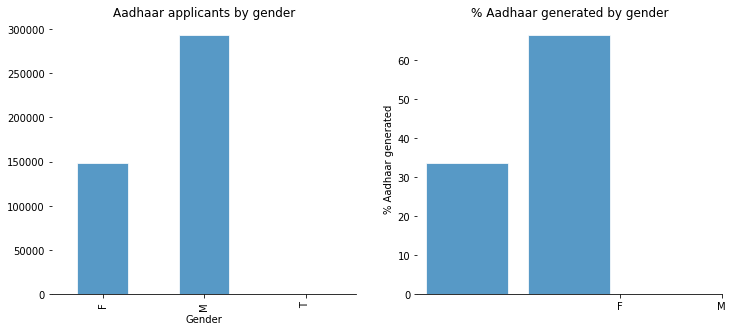

In [ ]:

fig,axes = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)
plt.sca(axes[0])
g = df.groupby('Gender')['Generated'].count()
g.plot(kind = 'bar',color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.title('Aadhaar applicants by gender')
plt.xticks([0,1,2],['F','M','T'])
prepare_plot_area(plt.gca())
plt.sca(axes[1])
plt.bar(['F','M'],[perF,perM],color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.xticks([1.5,2.5],['F','M'])
plt.title('% Aadhaar generated by gender')
plt.ylabel('% Aadhaar generated')
prepare_plot_area(plt.gca())

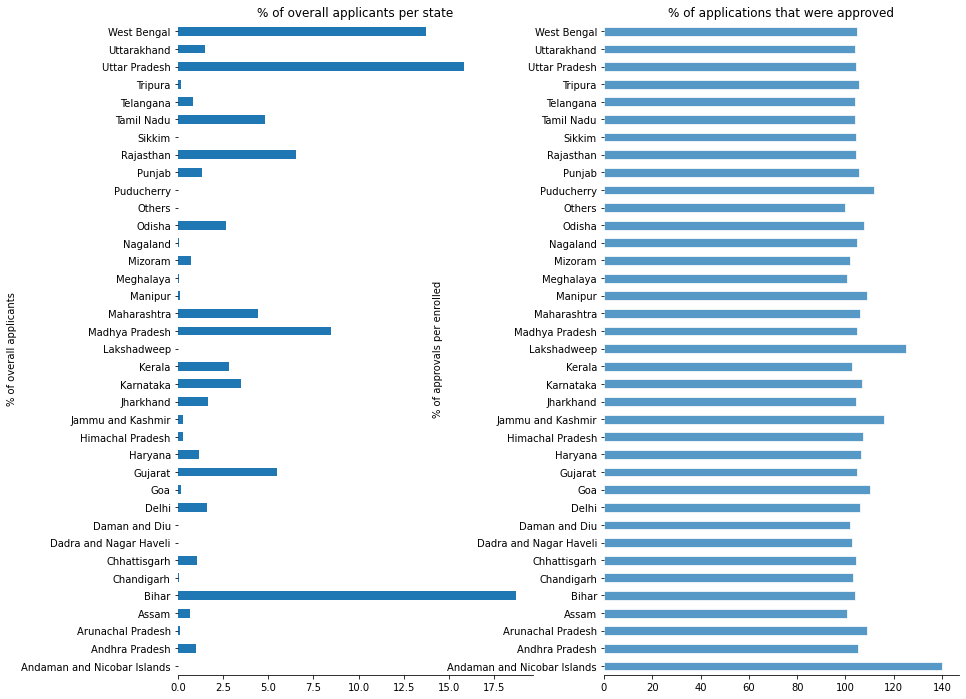

In [ ]:
# '% of overall applicants per state

d = df.groupby('State')['Generated'].sum()
c = df.groupby('State')['Generated'].count()
perc_gen_per_state = c/d*100
perc_total =  d/d.sum()*100
fig,axes = plt.subplots(figsize = (14,12),nrows = 1,ncols =2)
plt.sca(axes[0])
perc_total.plot(kind = 'barh')
plt.ylabel('% of overall applicants')
plt.title('% of overall applicants per state')
prepare_plot_area(plt.gca())


# % of applications that were approved

plt.sca(axes[1])
perc_gen_per_state.plot(kind = 'barh',color = colrcode[0],edgecolor = [1,1,1],alpha=  0.75)
plt.ylabel('% of approvals per enrolled')
plt.title('% of applications that were approved')
prepare_plot_area(plt.gca())